In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import urllib.request
import os
import warnings
import altair as alt
from vega_datasets import data
import plotly.express as px
warnings.filterwarnings('ignore')


In [3]:
if os.path.exists('yellow_taxi/'):
    pass
else:
    os.makedirs('yellow_taxi')

for year in [2022]:
    for month in range(1,13):
        urllib.request.urlretrieve ("https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_%s-%s.parquet"%(str(year),str(month).rjust(2, '0')),"yellow_taxi/yellow_tripdata_%s-%s.parquet"%(str(year),str(month).rjust(2, '0')))

In [4]:
files = os.listdir('yellow_taxi/')
dflist = []
for index, filename in enumerate(files):
    if '.parquet' in filename:
        if index == 0:
            df = pd.read_parquet('yellow_taxi/' + filename)
        else:
            df = pd.read_parquet('yellow_taxi/' + filename)
        dflist.append(df)
dfTaxi_yellow = pd.concat(dflist, axis = 0, ignore_index = True)
dfTaxi_yellow.count()

VendorID                 39656098
tpep_pickup_datetime     39656098
tpep_dropoff_datetime    39656098
passenger_count          38287795
trip_distance            39656098
RatecodeID               38287795
store_and_fwd_flag       38287795
PULocationID             39656098
DOLocationID             39656098
payment_type             39656098
fare_amount              39656098
extra                    39656098
mta_tax                  39656098
tip_amount               39656098
tolls_amount             39656098
improvement_surcharge    39656098
total_amount             39656098
congestion_surcharge     38287795
airport_fee              38287795
dtype: int64

In [5]:
dfTaxi_yellow = pd.read_parquet('yellow_taxi/')
dfTaxi_yellow

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.50,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.00,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.50,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.00,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.50,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39656093,2,2022-12-31 23:46:00,2023-01-01 00:11:00,NaN,11.56,NaN,None,16,36,0,39.55,0.0,0.5,8.21,0.0,1.0,49.26,NaN,NaN
39656094,2,2022-12-31 23:13:24,2022-12-31 23:29:08,NaN,5.06,NaN,None,75,50,0,26.23,0.0,0.5,0.00,0.0,1.0,30.23,NaN,NaN
39656095,2,2022-12-31 23:00:49,2022-12-31 23:26:57,NaN,13.35,NaN,None,168,197,0,47.73,0.0,0.5,9.85,0.0,1.0,59.08,NaN,NaN
39656096,1,2022-12-31 23:02:50,2022-12-31 23:16:05,NaN,0.00,NaN,None,238,116,0,12.74,0.0,0.5,0.00,0.0,1.0,16.74,NaN,NaN


In [6]:
taxi=gpd.read_file('https://data.cityofnewyork.us/api/geospatial/d3c5-ddgc?method=export&format=Shapefile')
taxi

,borough,location_i,objectid,shape_area,shape_leng,zone,geometry
0,EWR,1.0,1.0,0.000782,0.116357,Newark Airport,"POLYGON ((-74.18445 40.69500, -74.18449 40.695..."
1,Queens,2.0,2.0,0.004866,0.433470,Jamaica Bay,"MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ..."
2,Bronx,3.0,3.0,0.000314,0.084341,Allerton/Pelham Gardens,"POLYGON ((-73.84793 40.87134, -73.84725 40.870..."
3,Manhattan,4.0,4.0,0.000112,0.043567,Alphabet City,"POLYGON ((-73.97177 40.72582, -73.97179 40.725..."
4,Staten Island,5.0,5.0,0.000498,0.092146,Arden Heights,"POLYGON ((-74.17422 40.56257, -74.17349 40.562..."
...,...,...,...,...,...,...,...
258,Brooklyn,256.0,256.0,0.000169,0.067915,Williamsburg (South Side),"POLYGON ((-73.95834 40.71331, -73.95681 40.712..."
259,Bronx,259.0,259.0,0.000395,0.126750,Woodlawn/Wakefield,"POLYGON ((-73.85107 40.91037, -73.85207 40.909..."
260,Queens,260.0,260.0,0.000422,0.133514,Woodside,"POLYGON ((-73.90175 40.76078, -73.90147 40.759..."
261,Manhattan,261.0,261.0,0.000034,0.027120,World Trade Center,"POLYGON ((-74.01333 40.70503, -74.01327 40.704..."


In [7]:
dfTaxi_yellow.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')

In [8]:
dfTaxi_yellow=dfTaxi_yellow.dropna()
dfTaxi_yellow

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.0,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.5,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39529630,2,2022-12-31 23:36:15,2022-12-31 23:52:36,1.0,4.02,1.0,N,233,7,1,19.8,1.0,0.5,4.96,0.0,1.0,29.76,2.5,0.0
39529631,2,2022-12-31 23:09:34,2022-12-31 23:17:46,1.0,1.12,1.0,N,161,142,1,8.6,1.0,0.5,0.00,0.0,1.0,13.60,2.5,0.0
39529632,2,2022-12-31 23:39:06,2022-12-31 23:51:55,1.0,1.81,1.0,N,161,141,1,12.8,1.0,0.5,4.45,0.0,1.0,22.25,2.5,0.0
39529633,2,2022-12-31 23:09:37,2022-12-31 23:23:07,1.0,2.35,1.0,N,229,142,2,14.9,1.0,0.5,0.00,0.0,1.0,19.90,2.5,0.0


In [9]:
taxi=gpd.read_file('https://data.cityofnewyork.us/api/geospatial/d3c5-ddgc?method=export&format=Shapefile')
taxi.head()

,borough,location_i,objectid,shape_area,shape_leng,zone,geometry
0,EWR,1.0,1.0,0.000782,0.116357,Newark Airport,"POLYGON ((-74.18445 40.69500, -74.18449 40.695..."
1,Queens,2.0,2.0,0.004866,0.433470,Jamaica Bay,"MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ..."
2,Bronx,3.0,3.0,0.000314,0.084341,Allerton/Pelham Gardens,"POLYGON ((-73.84793 40.87134, -73.84725 40.870..."
3,Manhattan,4.0,4.0,0.000112,0.043567,Alphabet City,"POLYGON ((-73.97177 40.72582, -73.97179 40.725..."
4,Staten Island,5.0,5.0,0.000498,0.092146,Arden Heights,"POLYGON ((-74.17422 40.56257, -74.17349 40.562..."


In [10]:
#only take what we need
dfY=dfTaxi_yellow[['tpep_pickup_datetime','passenger_count', 'trip_distance','PULocationID']]

In [11]:
dfY#this is for general case that all day matters

,tpep_pickup_datetime,passenger_count,trip_distance,PULocationID
0,2022-01-01 00:35:40,2.0,3.80,142
1,2022-01-01 00:33:43,1.0,2.10,236
2,2022-01-01 00:53:21,1.0,0.97,166
3,2022-01-01 00:25:21,1.0,1.09,114
4,2022-01-01 00:36:48,1.0,4.30,68
...,...,...,...,...
39529630,2022-12-31 23:36:15,1.0,4.02,233
39529631,2022-12-31 23:09:34,1.0,1.12,161
39529632,2022-12-31 23:39:06,1.0,1.81,161
39529633,2022-12-31 23:09:37,1.0,2.35,229


In [12]:
dfY=dfY.groupby(by='PULocationID',as_index=False).count()[['PULocationID','passenger_count']].rename(columns={'passenger_count':'N_trips'})
dfY.sort_values(by='N_trips')

,PULocationID,N_trips
195,199,12
102,105,14
83,84,15
58,59,18
172,176,18
...,...,...
182,186,1277202
157,161,1544880
232,236,1612608
233,237,1824881


Text(0.5, 1.0, 'Yellow taxi trips by location Id')

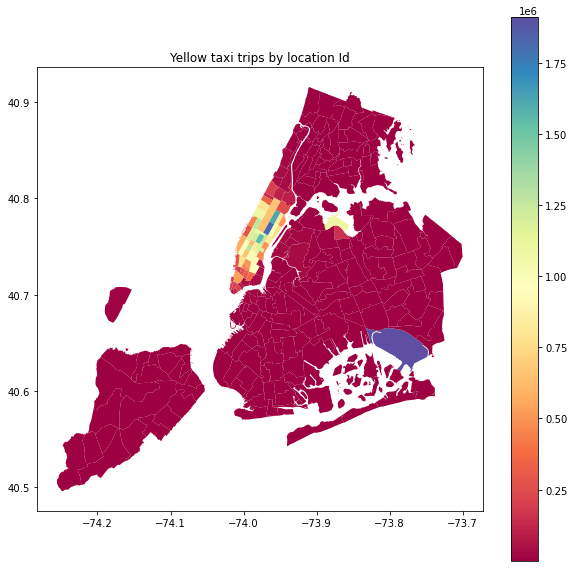

In [14]:
## first we plot the general trips per zipcode to see which zipcode has more trips
plot_zip=taxi.merge(dfY,left_on='location_i',right_on='PULocationID')
plot_zip.plot(column='N_trips',cmap='Spectral',figsize=(10,10),legend=True)
plt.title('Yellow taxi trips by location Id')

Text(0.5, 1.0, 'Normalized yellow taxi trips by location Id')

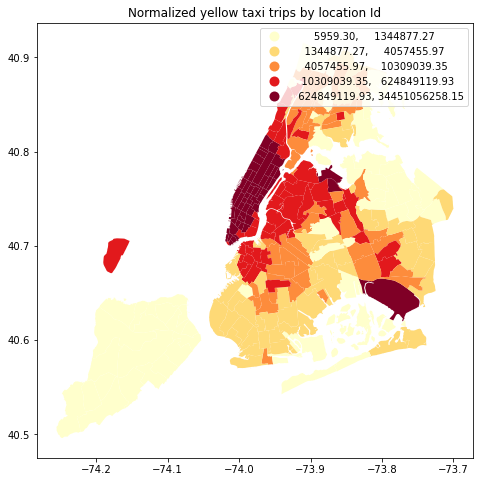

In [17]:
## This time we normalize our data by calculating the desity of trips, we can see which zipcode has the higher density of trips count.
# normalize number of complaints by area and plot

# convert sq.ft. to sq.miles
plot_zip['area_sqMile']=plot_zip['shape_area']
# divide by area
plot_zip['complaints_norm']=plot_zip['N_trips']/plot_zip['area_sqMile']
plot_zip.plot(column='complaints_norm',cmap='YlOrRd',figsize=(8,8),scheme='quantiles',legend=True)
plt.title('Normalized yellow taxi trips by location Id')

In [18]:
#rush hours of day
df=dfTaxi_yellow[['tpep_pickup_datetime','passenger_count','trip_distance','PULocationID']]
df

,tpep_pickup_datetime,passenger_count,trip_distance,PULocationID
0,2022-01-01 00:35:40,2.0,3.80,142
1,2022-01-01 00:33:43,1.0,2.10,236
2,2022-01-01 00:53:21,1.0,0.97,166
3,2022-01-01 00:25:21,1.0,1.09,114
4,2022-01-01 00:36:48,1.0,4.30,68
...,...,...,...,...
39529630,2022-12-31 23:36:15,1.0,4.02,233
39529631,2022-12-31 23:09:34,1.0,1.12,161
39529632,2022-12-31 23:39:06,1.0,1.81,161
39529633,2022-12-31 23:09:37,1.0,2.35,229


In [19]:
df['pickupHour']=df['tpep_pickup_datetime'].dt.hour
df

,tpep_pickup_datetime,passenger_count,trip_distance,PULocationID,pickupHour
0,2022-01-01 00:35:40,2.0,3.80,142,0
1,2022-01-01 00:33:43,1.0,2.10,236,0
2,2022-01-01 00:53:21,1.0,0.97,166,0
3,2022-01-01 00:25:21,1.0,1.09,114,0
4,2022-01-01 00:36:48,1.0,4.30,68,0
...,...,...,...,...,...
39529630,2022-12-31 23:36:15,1.0,4.02,233,23
39529631,2022-12-31 23:09:34,1.0,1.12,161,23
39529632,2022-12-31 23:39:06,1.0,1.81,161,23
39529633,2022-12-31 23:09:37,1.0,2.35,229,23


In [20]:
trips_Hour=df[['pickupHour','PULocationID']].groupby(by='pickupHour',as_index=False).count()
trips_Hour.rename(columns={'PULocationID':'N_trips'},inplace=True)
trips_Hour

,pickupHour,N_trips
0,0,1053604
1,1,693232
2,2,459347
3,3,300523
4,4,197785
5,5,232024
6,6,577572
7,7,1076395
8,8,1439322
9,9,1648904


Text(0, 0.5, 'Number of trips')

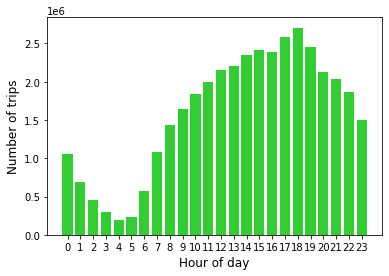

In [22]:
plt.bar(trips_Hour.pickupHour,trips_Hour.N_trips,color='limegreen')
plt.xticks(trips_Hour.pickupHour)
plt.xlabel('Hour of day',fontsize=12)
plt.ylabel('Number of trips',fontsize=12)

We can see that the trend of taxi trips starts from 4 am, which is the lowest of the day, and starts to go up. The trend peaks at 6 pm and decline after that. 

In [23]:
#7am-9am
index=(df.pickupHour>6)&(df.pickupHour<10)
df_morning=df[index]
df_morning

,tpep_pickup_datetime,passenger_count,trip_distance,PULocationID,pickupHour
17375,2022-01-01 07:04:21,5.0,0.84,244,7
17622,2022-01-01 07:00:39,1.0,9.89,48,7
17786,2022-01-01 07:04:30,1.0,1.17,163,7
17900,2022-01-01 07:01:59,2.0,9.16,230,7
17966,2022-01-01 07:08:43,2.0,0.30,186,7
...,...,...,...,...,...
39471195,2022-12-31 09:05:32,1.0,2.47,75,9
39471337,2022-12-31 08:40:29,1.0,2.30,229,8
39471338,2022-12-31 08:55:47,1.0,1.50,68,8
39472161,2022-12-31 08:42:07,2.0,2.08,68,8


In [24]:
df_morning=df_morning.groupby(by='PULocationID',as_index=False).agg({'pickupHour':'count','trip_distance': 'sum','passenger_count':'sum'})
df_morning.rename(columns={'pickupHour':'N_trips'},inplace=True)
df_morning['average_distance']=df_morning.trip_distance/df_morning.N_trips
df_morning['average_passengers']=df_morning.passenger_count/df_morning.N_trips
df_morning=df_morning[['PULocationID','average_distance','average_passengers','N_trips']]
df_morning

,PULocationID,average_distance,average_passengers,N_trips
0,1,0.820289,1.716015,1074
1,2,15.710000,1.000000,1
2,3,5.412683,1.024390,123
3,4,2.876969,1.278912,2352
4,5,13.759927,1.000000,137
...,...,...,...,...
257,261,4.830260,1.399971,13911
258,262,4.378067,1.302106,98535
259,263,2.647753,1.301386,109129
260,264,5.416789,1.349740,46749


In [25]:
from sklearn.cluster import KMeans
#use n=2 as optimal to try k-means clustering.
km=KMeans(random_state=234,n_clusters=2)
res1=km.fit(df_morning[['average_distance','N_trips']])
print('Cluster assignments:',res1.labels_)
print('\nCluster centers:\n',res1.cluster_centers_)
print('\nSum of squared errors:',res1.inertia_)

Cluster assignments: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 0]

Cluster centers:
 [[7.68934853e+00 3.15915152e+03]
 [3.20149668e+00 1.10801839e+05]]

Sum of squared errors: 83954264935.92644


Text(0.5, 1.0, 'K-means Cluster')

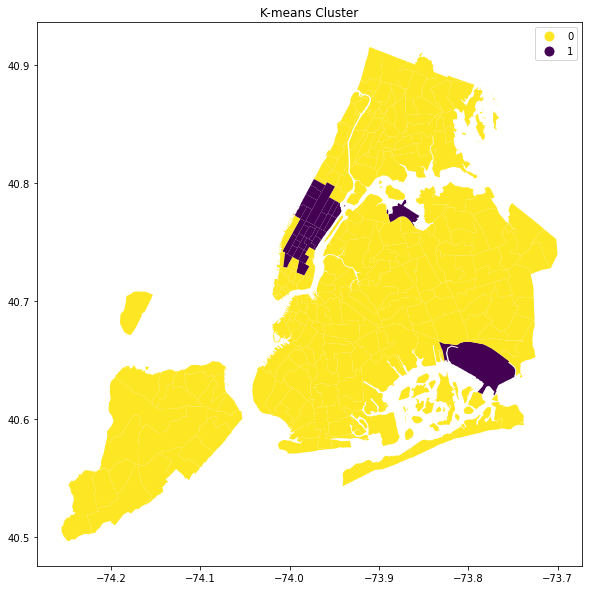

In [26]:
df_morning['cluster']=res1.labels_
res1=df_morning[['PULocationID','cluster']]
res1=taxi.merge(res1,left_on='location_i',right_on='PULocationID')
res1['cluster']=res1['cluster'].astype(str)
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(20,10))
res1.plot(column='cluster',cmap='viridis_r',legend=True,ax=ax)
plt.title('K-means Cluster')

The k-means for the situation when n=2 performs really well. In the graph, we can see that the center place of Manhattan, airport of JFK and LaGuardia forms one cluster, and the other places of NYC form another cluster. Since it is already performs well, I will not use silhouette score and elbow plotting method to check the n cluster.


Cluster centers:
 [[5.01060251e+00 7.11095299e+03]
 [2.97440612e+00 2.17118964e+05]]

Cluster centers:
 [[5.08292859e+00 3.90648230e+03]
 [3.33621911e+00 2.88501500e+05]
 [2.79116118e+00 1.41600458e+05]]

Cluster centers:
 [[5.10642421e+00 3.31938839e+03]
 [2.78007148e+00 2.27990143e+05]
 [2.55488327e+00 1.18378300e+05]
 [5.47666730e+00 3.60080750e+05]]

Cluster centers:
 [[3.11686783e+00 7.18979474e+04]
 [5.17795581e+00 1.38559070e+03]
 [5.47666730e+00 3.60080750e+05]
 [2.87827505e+00 2.36100750e+05]
 [2.23645013e+00 1.50483250e+05]]

Cluster centers:
 [[5.16988734e+00 1.11116901e+03]
 [2.88228412e+00 1.74410500e+05]
 [5.47666730e+00 3.60080750e+05]
 [2.70003824e+00 1.08790417e+05]
 [2.26599501e+00 2.52711875e+05]
 [3.65814284e+00 4.97066154e+04]]

Cluster centers:
 [[5.17193840e+00 9.99075472e+02]
 [2.23448050e+00 2.66364200e+05]
 [2.89506988e+00 1.00352667e+05]
 [5.47666730e+00 3.60080750e+05]
 [3.73506573e+00 4.79329286e+04]
 [2.22917262e+00 1.53065727e+05]
 [3.33812831e+00 2.1448

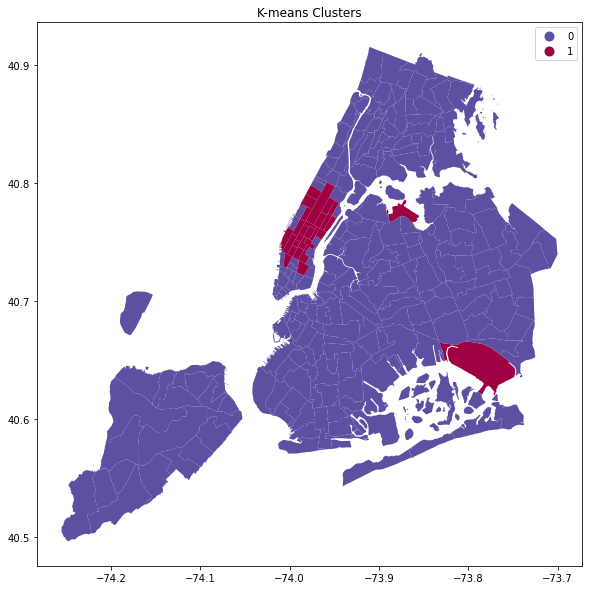

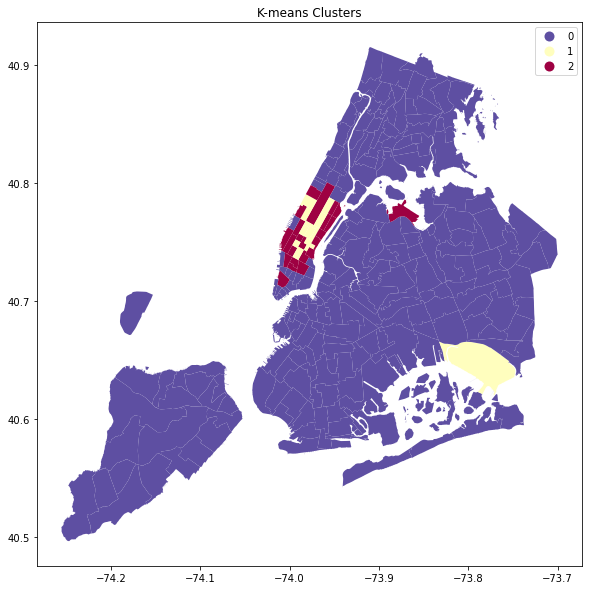

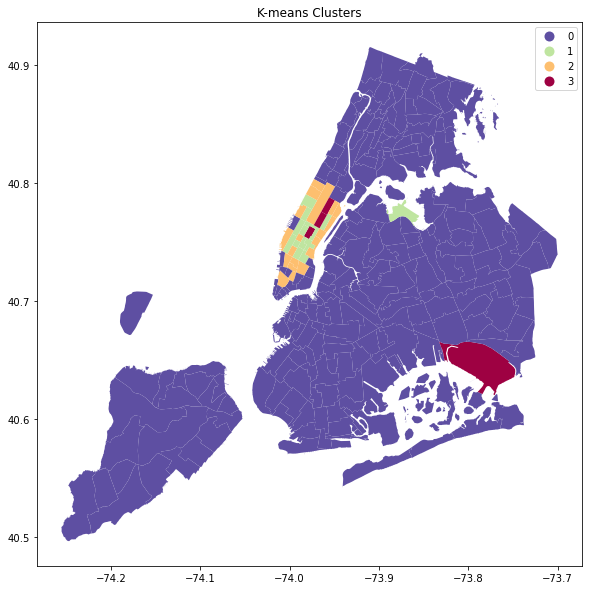

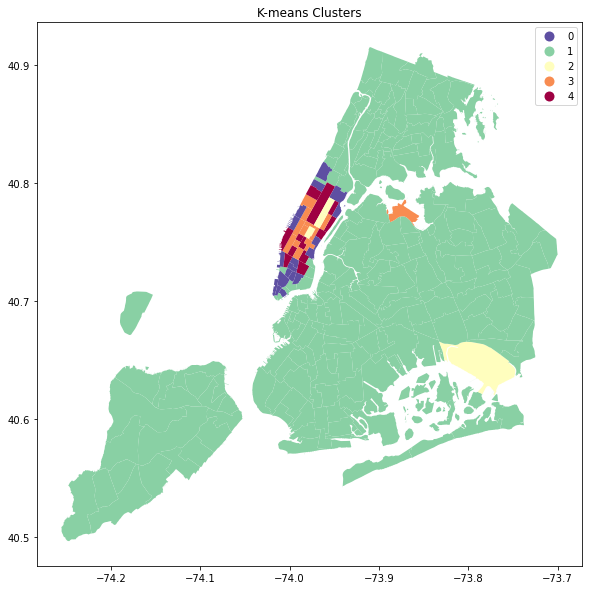

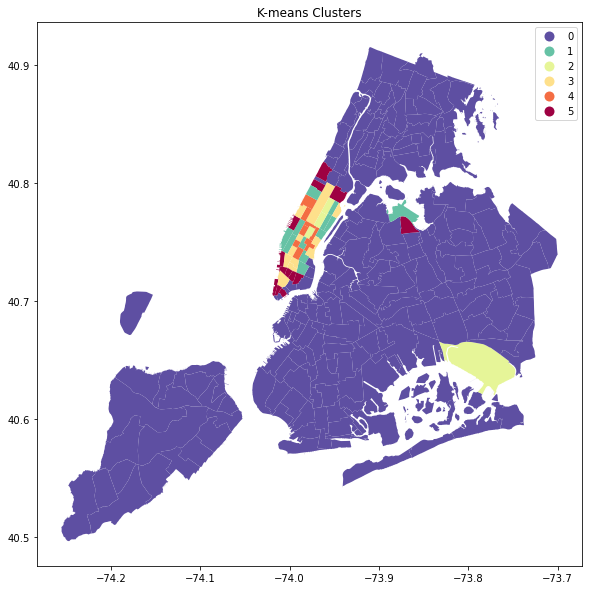

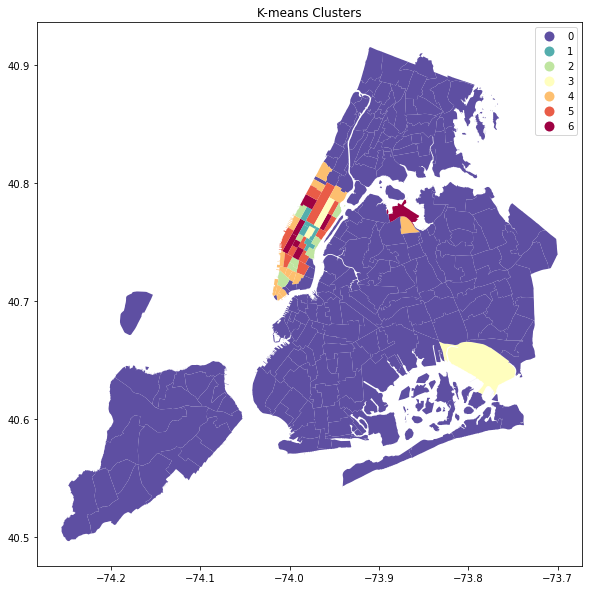

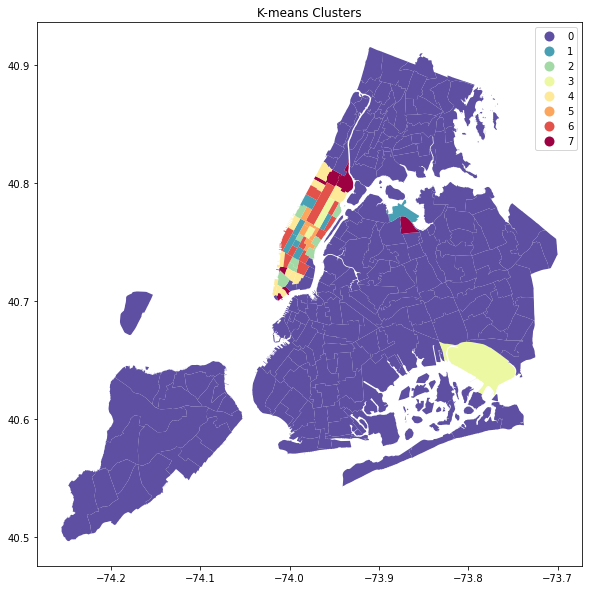

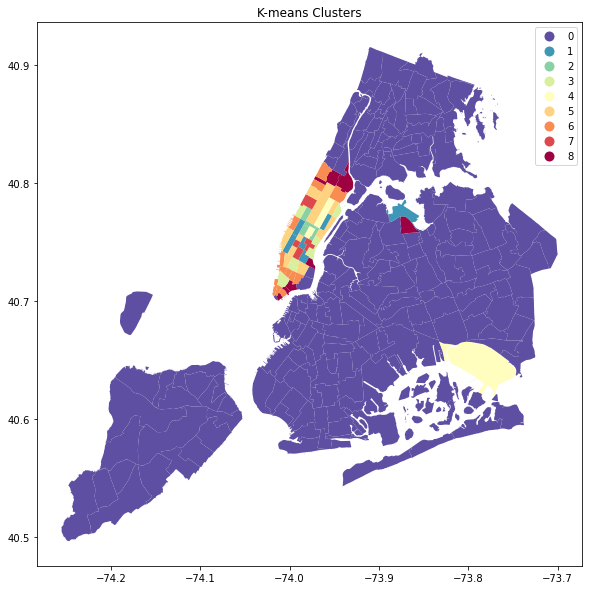

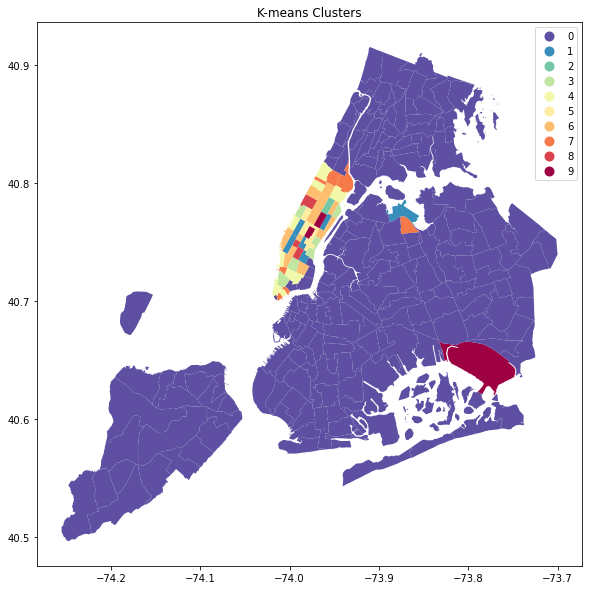

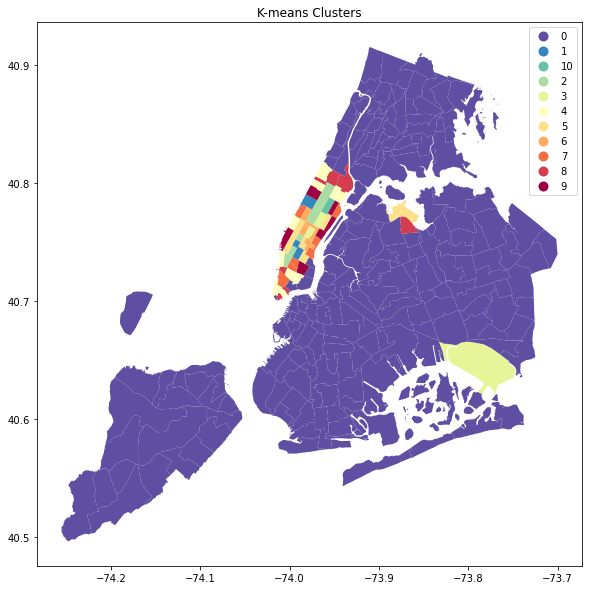

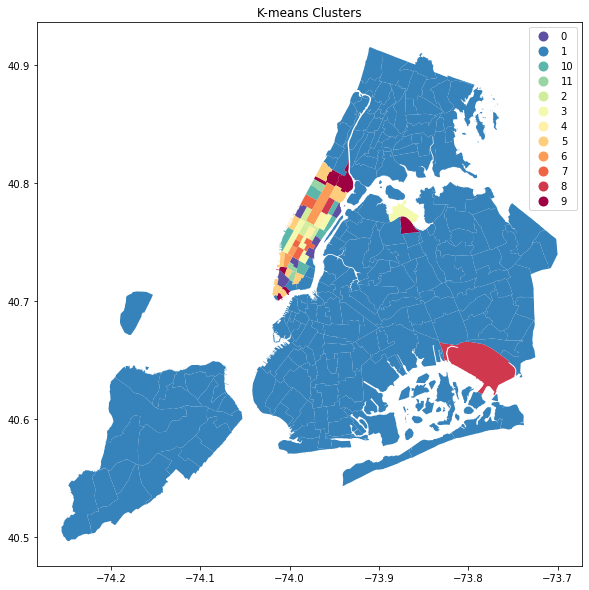

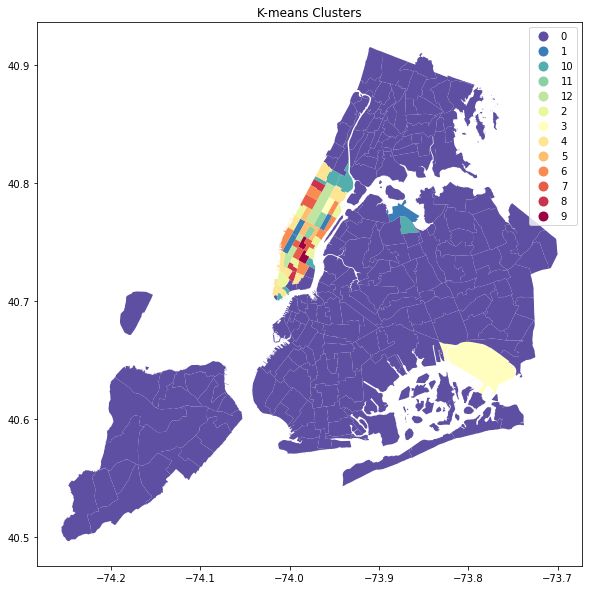

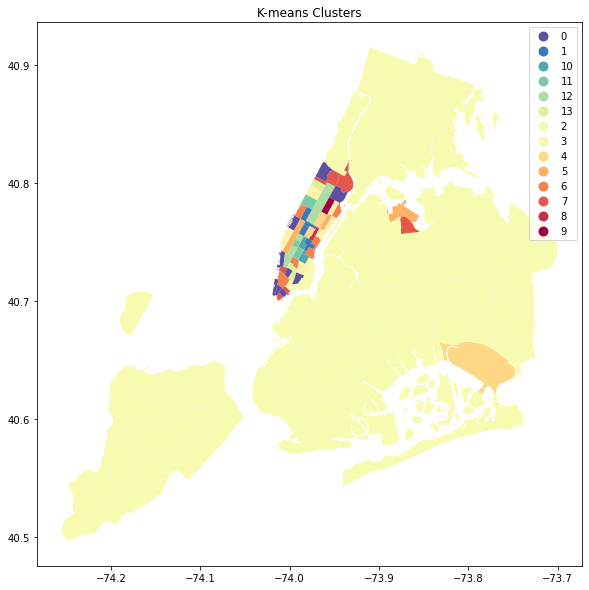

In [ ]:
#evening rush hour

index2=(df.pickupHour>16)&(df.pickupHour<20)
df_evening=df[index2]
df_evening=df_evening.groupby(by='PULocationID',as_index=False).agg({'pickupHour':'count','trip_distance': 'sum','passenger_count': 'sum'})
df_evening.rename(columns={'pickupHour':'N_trips'}, inplace=True)
df_evening['average_distance']=df_evening.trip_distance/df_evening.N_trips
df_evening['average_passengers']=df_evening.passenger_count/df_evening.N_trips
df_evening=df_evening[['PULocationID','average_distance','N_trips']]

for i in range(15):
    df_eve=df_evening
    km=KMeans(n_clusters=i+2)
    km=km.fit(df_eve[['average_distance','N_trips']])
    df_eve['cluster']=km.labels_
    df_eve=taxi.merge(df_eve,left_on='location_i',right_on='PULocationID')
    df_eve['cluster']=df_eve['cluster'].astype(str)
    
    fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(20,10))
    df_eve.plot(column='cluster',cmap='Spectral_r',legend=True,ax=ax)
    plt.title('K-means Clusters')
    print('\nCluster centers:\n',km.cluster_centers_)
    #print('\nSum of squared errors:',km.inertia_)

In [220]:
df_final1=taxi.merge(df_morning,left_on='location_i',right_on='PULocationID')
df_final1

,borough,location_i,objectid,shape_area,shape_leng,zone,geometry,PULocationID,average_distance,average_passengers,N_trips,cluster
0,EWR,1.0,1.0,0.000782,0.116357,Newark Airport,"POLYGON ((-74.18445 40.69500, -74.18449 40.695...",1,0.820289,1.716015,1074,0
1,Queens,2.0,2.0,0.004866,0.433470,Jamaica Bay,"MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ...",2,15.710000,1.000000,1,0
2,Bronx,3.0,3.0,0.000314,0.084341,Allerton/Pelham Gardens,"POLYGON ((-73.84793 40.87134, -73.84725 40.870...",3,5.412683,1.024390,123,0
3,Manhattan,4.0,4.0,0.000112,0.043567,Alphabet City,"POLYGON ((-73.97177 40.72582, -73.97179 40.725...",4,2.876969,1.278912,2352,0
4,Staten Island,5.0,5.0,0.000498,0.092146,Arden Heights,"POLYGON ((-74.17422 40.56257, -74.17349 40.562...",5,13.759927,1.000000,137,0
...,...,...,...,...,...,...,...,...,...,...,...,...
254,Brooklyn,256.0,256.0,0.000169,0.067915,Williamsburg (South Side),"POLYGON ((-73.95834 40.71331, -73.95681 40.712...",256,5.270141,1.268551,283,0
255,Bronx,259.0,259.0,0.000395,0.126750,Woodlawn/Wakefield,"POLYGON ((-73.85107 40.91037, -73.85207 40.909...",259,6.586731,1.043269,208,0
256,Queens,260.0,260.0,0.000422,0.133514,Woodside,"POLYGON ((-73.90175 40.76078, -73.90147 40.759...",260,3.721745,1.356087,1421,0
257,Manhattan,261.0,261.0,0.000034,0.027120,World Trade Center,"POLYGON ((-74.01333 40.70503, -74.01327 40.704...",261,4.830260,1.399971,13911,0


In [233]:
df_final1.insert(11,'geometry',df_final1.pop('geometry'))
df_final1.insert(10,'location_i',df_final1.pop('location_i'))
df_final1.insert(9,'objectid',df_final1.pop('objectid'))
df_final1.insert(8,'shape_area',df_final1.pop('shape_area'))
df_final1.insert(7,'shape_leng',df_final1.pop('shape_leng'))
df_final1.insert(6,'zone',df_final1.pop('zone'))
df_final1.insert(5,'average_passengers',df_final1.pop('average_passengers'))
print(df_final1)

           borough  PULocationID  average_distance  N_trips  cluster  \
0              EWR             1          0.820289     1074        0   
1           Queens             2         15.710000        1        0   
2            Bronx             3          5.412683      123        0   
3        Manhattan             4          2.876969     2352        0   
4    Staten Island             5         13.759927      137        0   
..             ...           ...               ...      ...      ...   
254       Brooklyn           256          5.270141      283        0   
255          Bronx           259          6.586731      208        0   
256         Queens           260          3.721745     1421        0   
257      Manhattan           261          4.830260    13911        0   
258      Manhattan           262          4.378067    98535        1   

     average_passengers                       zone  shape_leng  shape_area  \
0              1.716015             Newark Airport    0.1

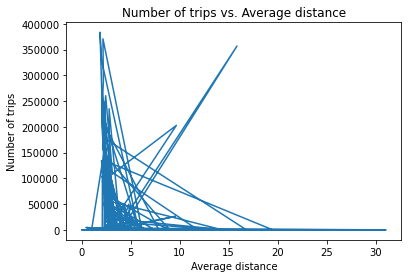

In [214]:
fig = plt.figure()
data = [df_final1]
for frame in [df_final]:

    plt.plot(frame['average_distance'], frame['N_trips'])

plt.xlabel('Average distance') 
plt.ylabel('Number of trips') 
plt.title("Number of trips vs. Average distance")
plt.show()

In [197]:
df_final1.to_csv('/Users/ruijiang/Desktop/df_final1.csv')

In [198]:
#df_final1.dtypes

In [199]:
#df_final1["borough"] = df_final1["borough"].astype("category")
#df_final1["location_i"] = df_final1["location_i"].astype("float")
#df_final1["PULocationID"] = df_final1["PULocationID"].astype("int")
#df_final1["average_distance"] = df_final1["average_distance"].astype("float")
#df_final1["average_passengers"] = df_final1["average_passengers"].astype("float")
#df_final1["N_trips"] = df_final1["N_trips"].astype("int")
#df_final1["cluster"] = df_final1["cluster"].astype("int")


In [200]:

# Plot!
#location_selection = alt.selection(type="multi",
        #on="click", fields=["location_i"], nearest=True)

#L_selection = alt.selection(type="single",
       # on="mouseover", fields=["PULocationID"], nearest=True, empty="none")

#borough_dropdown=alt.binding_select(
       # options=pd.unique(df_final1["borough"]).tolist(),
       # name="Borough: ")
#borough_selection=alt.selection(type="single",
       # bind=borough_dropdown, init={"BOROUGH": "Manhattan"})

#df_final1.plot()

In [216]:
df_final2=taxi.merge(df_evening,left_on='location_i',right_on='PULocationID')
df_final2

,borough,location_i,objectid,shape_area,shape_leng,zone,geometry,PULocationID,average_distance,N_trips,cluster
0,EWR,1.0,1.0,0.000782,0.116357,Newark Airport,"POLYGON ((-74.18445 40.69500, -74.18449 40.695...",1,0.656262,2365,14
1,Queens,2.0,2.0,0.004866,0.433470,Jamaica Bay,"MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ...",2,15.440000,4,14
2,Bronx,3.0,3.0,0.000314,0.084341,Allerton/Pelham Gardens,"POLYGON ((-73.84793 40.87134, -73.84725 40.870...",3,5.867143,49,14
3,Manhattan,4.0,4.0,0.000112,0.043567,Alphabet City,"POLYGON ((-73.97177 40.72582, -73.97179 40.725...",4,2.602705,5043,0
4,Staten Island,5.0,5.0,0.000498,0.092146,Arden Heights,"POLYGON ((-74.17422 40.56257, -74.17349 40.562...",5,9.042708,96,14
...,...,...,...,...,...,...,...,...,...,...,...
254,Brooklyn,256.0,256.0,0.000169,0.067915,Williamsburg (South Side),"POLYGON ((-73.95834 40.71331, -73.95681 40.712...",256,3.678903,1295,14
255,Bronx,259.0,259.0,0.000395,0.126750,Woodlawn/Wakefield,"POLYGON ((-73.85107 40.91037, -73.85207 40.909...",259,5.304717,53,14
256,Queens,260.0,260.0,0.000422,0.133514,Woodside,"POLYGON ((-73.90175 40.76078, -73.90147 40.759...",260,4.025518,955,14
257,Manhattan,261.0,261.0,0.000034,0.027120,World Trade Center,"POLYGON ((-74.01333 40.70503, -74.01327 40.704...",261,4.073574,40244,4


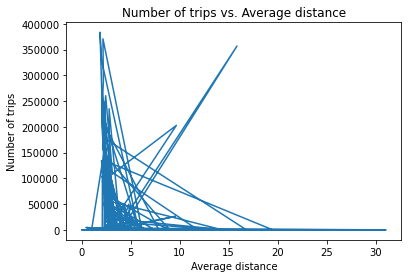

In [218]:
fig = plt.figure()
data = [df_final2]
for frame in [df_final2]:

    plt.plot(frame['average_distance'], frame['N_trips'])

plt.xlabel('Average distance') 
plt.ylabel('Number of trips') 
plt.title("Number of trips vs. Average distance")
plt.show()

In [202]:
df_final2.to_csv('/Users/ruijiang/Desktop/df_final2.csv')

In [235]:
import geopandas as gpd

gdf = gpd.GeoDataFrame(df_final1, geometry='geometry', crs='EPSG:4326')

gdf.to_file("output.shp", driver='ESRI Shapefile')